In [1]:
import pickle
from collections import defaultdict
%run utils_rf

In [2]:
with open('log_loss_results.pkl','rb') as f:
    log_loss_results = pickle.load(f)

In [3]:
with open('mae_results.pkl','rb') as f:
    mae_results = pickle.load(f)

In [4]:
def get_summaries(results):
    scores = defaultdict(list)
    for i in range(20):
        for run in results[i]:
            score = results[i][run]['avg_score']
            features = results[i][run]['feature_names']
            scores[features].append(score)
    score_summaries = defaultdict(dict)
    for features in scores:
        score_summaries[features]['mean'] = np.mean(scores[features])
        score_summaries[features]['std'] = np.std(scores[features])
        score_summaries[features]['count'] = len(scores[features])
    return score_summaries

In [5]:
def find_best(results, n):
    score_summaries = get_summaries(results)
    best_dict = defaultdict(dict)
    for i in range(n):
        score_summaries_filtered = defaultdict(dict)
        for features in score_summaries:
            if score_summaries[features]['count']>i:
                score_summaries_filtered[features]=score_summaries[features]
        best = -1
        best_features = []
        for features in score_summaries_filtered:
            if score_summaries_filtered[features]['mean']>best:
                best = score_summaries_filtered[features]['mean']
                best_features = features
        best_dict[i + 1]['score'] = best
        best_dict[i + 1]['features'] = best_features
    return best_dict

In [9]:
find_best(mae_results,6)

defaultdict(dict,
            {1: {'score': -0.10723006321490121,
              'features': ('value.Learning Strategies',
               'value.Monitoring',
               'value.Persuasion',
               'value.Service Orientation',
               'value.Management of Material Resources',
               'value.Information Ordering',
               'value.Memorization',
               'value.Flexibility of Closure',
               'value.Time Sharing',
               'value.Finger Dexterity',
               'value.Far Vision',
               'value.Computers and Electronics',
               'value.Chemistry',
               'value.Biology',
               'value.Foreign Language',
               'work_num')},
             2: {'score': -0.11207076772247607,
              'features': ('value.Mathematics Skill',
               'value.Science',
               'value.Monitoring',
               'value.Service Orientation',
               'value.Management of Material Resources',
         

In [14]:
def find_best_in_run(results):
    best_dict = defaultdict(dict)
    
    for i in range(20):
        best = -1
        best_features = []
        for run in results[i]:
            score = results[i][run]['avg_score']
            features = results[i][run]['feature_names']
            if score>best:
                best=score
                best_features = features
        best_dict[i]['score'] = best
        best_dict[i]['features'] = best_features 
    return best_dict

In [72]:
run_bests = find_best_in_run(mae_results)
best_lens = []
for i in range(20):
    best_lens.append(len(run_bests[i]['features']))

(array([2., 0., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 6., 0., 4., 0., 2.,
        0., 1., 1.]),
 array([10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ,
        15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ]),
 <a list of 20 Patch objects>)

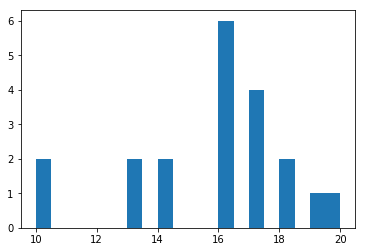

In [77]:
plt.hist(best_lens,bins=20)

In [47]:
performance = []
for i in range(20):
    feature_count_scores = np.zeros(30)
    for run in mae_results[i]:
        feature_count = len(mae_results[i][run]['feature_idx'])
        score = abs(mae_results[i][run]['avg_score'])
        if score > feature_count_scores[feature_count-1]:
            feature_count_scores[feature_count-1]=score
    performance.append(feature_count_scores)

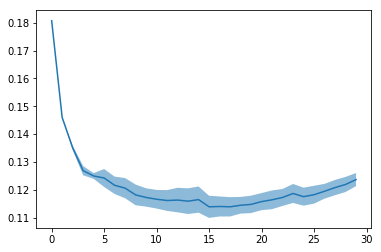

In [68]:
performance = pd.DataFrame(performance)
avg_score = performance.mean(axis=0)
std_score = performance.std(axis=0)
plt.plot(avg_score)
plt.fill_between(range(0,30),avg_score-std_score,avg_score+std_score,alpha=0.5)
plt.show()

In [108]:
#consitency in bests!
all_best_features = np.asarray(run_bests[0]['features'])
for i in range(1,20):
    new = np.asarray(run_bests[i]['features'])
    all_best_features = np.append(all_best_features,new)

In [121]:
unique, counts = np.unique(all_best_features, return_counts=True)
best_feature_counts = dict(zip(unique, counts))
pd.Series(best_feature_counts).sort_values(ascending=False)

value.Service Orientation                  20
value.Computers and Electronics            20
work_num                                   19
value.Chemistry                            19
value.Information Ordering                 19
value.Time Sharing                         17
value.Monitoring                           17
value.Mathematics Skill                    14
value.Flexibility of Closure               13
value.Fluency of Ideas                     13
value.Management of Material Resources     13
value.Science                              12
value.Selective Attention                  12
value.Inductive Reasoning                  10
value.Deductive Reasoning                   9
value.Persuasion                            8
value.Production and Processing             7
value.Management of Financial Resources     6
value.Memorization                          6
value.Perceptual Speed                      5
value.Finger Dexterity                      5
value.Foreign Language            

In [123]:
chosen = ['value.Learning Strategies',
               'value.Monitoring',
               'value.Persuasion',
               'value.Service Orientation',
               'value.Management of Material Resources',
               'value.Information Ordering',
               'value.Memorization',
               'value.Flexibility of Closure',
               'value.Time Sharing',
               'value.Finger Dexterity',
               'value.Far Vision',
               'value.Computers and Electronics',
               'value.Chemistry',
               'value.Biology',
               'value.Foreign Language',
               'work_num']

In [126]:
for feature in chosen:
    print(feature)
    print(best_feature_counts[feature])

value.Learning Strategies
3
value.Monitoring
17
value.Persuasion
8
value.Service Orientation
20
value.Management of Material Resources
13
value.Information Ordering
19
value.Memorization
6
value.Flexibility of Closure
13
value.Time Sharing
17
value.Finger Dexterity
5
value.Far Vision
3
value.Computers and Electronics
20
value.Chemistry
19
value.Biology
2
value.Foreign Language
4
work_num
19
